In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Pool Pool_49: 50154 MS/MS scans, 33910 identified, % identified: 67.61%
Pool Pool_52: 49044 MS/MS scans, 31605 identified, % identified: 64.44%
Pool Pool_60: 49461 MS/MS scans, 31502 identified, % identified: 63.69%
{'Pool_49': 50154, 'Pool_52': 49044, 'Pool_60': 49461}
{'Pool_49': 33910, 'Pool_52': 31605, 'Pool_60': 31502}


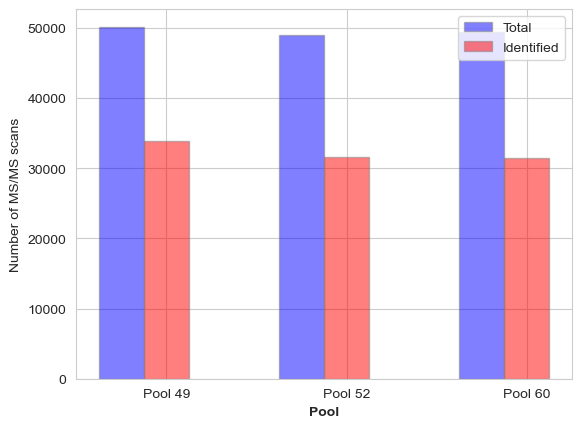

In [12]:
pools = [
        ('Pool_49', 'BA7'),
        ('Pool_52', 'BD7'),
        ('Pool_60', 'BD8')]

count_dict = {}
ident_dict = {}
for p in pools:
    expected_pool = pd.read_csv(
        f"../../Data/Datasets/{p[0]}/Thermo_SRM_{p[0]}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
        sep='\t')
    count_dict[p[0]] = expected_pool.shape[0]
    ident_dict[p[0]] = expected_pool.query('Identified == \'+\'').shape[0]
    print(f"Pool {p[0]}: {count_dict[p[0]]} MS/MS scans, {ident_dict[p[0]]} identified, % identified: {ident_dict[p[0]]/count_dict[p[0]]*100:.2f}%")
print(count_dict)
print(ident_dict)
# create grouped bar chart
fig, ax = plt.subplots()
barWidth = 0.25
r1 = range(len(count_dict))
r2 = [x + barWidth for x in r1]
plt.bar(r1, count_dict.values(), color='b', alpha=0.5, width=barWidth, edgecolor='grey', label='Total')
plt.bar(r2, ident_dict.values(), color='r',alpha=0.5, width=barWidth, edgecolor='grey', label='Identified')
plt.xlabel('Pool', fontweight='bold')
plt.ylabel('Number of MS/MS scans')
plt.xticks([r + barWidth for r in range(len(count_dict))], count_dict.keys())
# change x axis labels
ax.set_xticklabels([' '.join(p[0].split('_')) for p in pools])
plt.legend()
plt.show()
